##         ***Prediction on Diabetes Patient's Hospital Readmission***



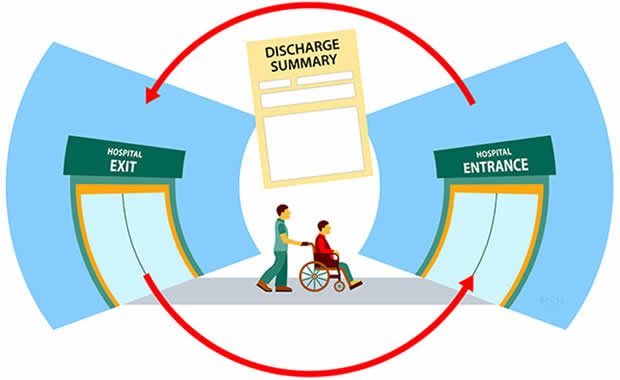

# Problem Statement and Objective:

 A hospital readmission is when a patient who is discharged from the hospital, gets re-admitted again within a certain period of time. Hospital readmission rates for certain conditions are now considered an indicator of hospital quality, and also affect the cost of care adversely. For this reason, Centers for Medicare & Medicaid Services established the Hospital Readmissions Reduction Program which aims to improve quality of care for patients and reduce health care spending by applying payment penalties to hospitals that have more than expected readmission rates for certain conditions. Although diabetes is not yet included in the penalty measures, the program is regularly adding new disease conditions to the list, now totaling 6 for FY2018. In 2011, American hospitals spent over $41 billion on diabetic patients who got readmitted within 30 days of discharge. Being able to determine factors that lead to higher readmission in such patients, and correspondingly being able to predict which patients will get readmitted can help hospitals save millions of dollars while improving quality of care. So, with that background in mind, we used a medical claims dataset (description below), to answer these questions:

What factors are the strongest predictors of hospital readmission in diabetic patients?

How well can we predict hospital readmission in this dataset with limited features?

## ***Data Set Description***

**Encounter ID**: Unique identifier of an encounter

**Patient number**: Unique identifier of a patient

**Race Values**: Caucasian, Asian, African American, Hispanic, and other

**Gender Values**: male, female, and unknown/invalid
Age Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)

**Weight**: Weight in pounds

**Admission type**: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available

**Discharge disposition**: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

**Admission source**: Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital


**Time in hospital**: Integer number of days between admission and discharge

**Payer code** : Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

**Medical specialty**: Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

**Number of lab procedures**: Number of lab tests performed during the encounter

**Number of procedures**: Numeric Number of procedures (other than lab tests) performed during the encounter

**Number of medications**: Number of distinct generic names administered during the encounter

**Number of outpatient visits**: Number of outpatient visits of the patient in the year preceding the encounter

**Number of emergency visits**: Number of emergency visits of the patient in the year preceding the encounter

**Number of inpatient visits**: Number of inpatient visits of the patient in the year preceding the encounter

**Diagnosis 1**: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

**Diagnosis 2**: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

**Diagnosis 3**: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

**Number of diagnoses** : Number of diagnoses entered to the system 0%

**Glucose serum test** : result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

**A1c test result** : Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

**Change of medications** : Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

**Diabetes medications** : Indicates if there was any diabetic medication prescribed. Values: “yes” and “no” 24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

**Readmitted** : Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

## **Data Preparation & Exploration**

In [521]:
#Importing necessary packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt



In [522]:
#Loading Dataset
df=pd.read_csv('diabetic_data_new.csv')

In [523]:
#Displaying first 10 rows of data
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [524]:
#checking shape of the dataset
df.shape

(101766, 50)

In [525]:
#Checking data types of each variable
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [526]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Ok, now that we have a glimpse of the data, let's explore them.

First ,we will remove ID columns because this will not contribute to our model

In [528]:
#removing id columns
df.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

Removing Columns which contain unique values

In [529]:
list_unique_columns=[]
for i in df.columns:
    if len(df[i].value_counts())==1:
        list_unique_columns.append(i)
for i in list_unique_columns:
    df.drop([i],axis=1,inplace=True)

In our dataset, we have '?' as a value for many records so replace it with nan.



In [530]:
#replace ? with nan
df=df.replace('?',np.nan)

Let's check whether our data has missing values

In [531]:
#missing value function
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return tt    

missing_data(df)['Percent'].sort_values(ascending=False)

weight                      96.858479
medical_specialty           49.082208
payer_code                  39.557416
race                         2.233555
diag_3                       1.398306
diag_2                       0.351787
diag_1                       0.020636
miglitol                     0.000000
glipizide                    0.000000
glyburide                    0.000000
tolbutamide                  0.000000
pioglitazone                 0.000000
rosiglitazone                0.000000
acarbose                     0.000000
tolazamide                   0.000000
troglitazone                 0.000000
glimepiride                  0.000000
insulin                      0.000000
glyburide-metformin          0.000000
glipizide-metformin          0.000000
glimepiride-pioglitazone     0.000000
metformin-rosiglitazone      0.000000
metformin-pioglitazone       0.000000
change                       0.000000
diabetesMed                  0.000000
acetohexamide                0.000000
repaglinide 

As we can see above the dataset,
Weight column has (96%) of missing values 
followed by medical_specialty(37%) 
and payer code(61%)

## **Null Handling**

In [532]:
#weight column since it has more missing value 
df['weight'].value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

Since weight is not filled often we are creating new flag column and dropping original column

In [533]:
df['has_weight']=df['weight'].notnull().astype('int')
df.drop(['weight'],axis=1,inplace=True)

In [534]:
df.has_weight

0         0
1         0
2         0
3         0
4         0
         ..
101761    0
101762    0
101763    0
101764    0
101765    0
Name: has_weight, Length: 101766, dtype: int32

Analyzing medical_speciality column

In [535]:
df['medical_specialty'].isnull().sum()
df['medical_specialty']=df['medical_specialty'].fillna('UNK') #filling null with unk
print(df['medical_specialty'].nunique()) #more categories

73


In [536]:
print(df['medical_specialty'].value_counts())

UNK                              49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64


Since many categories has less sample we will change the column into the top 10 specialities and then an other category

In [537]:
top_10=['UNK','InternalMedicine',
        'Emergency/Trauma','Family/GeneralPractice','Cardiology','Surgery-General',
        'Nephrology','Orthopedics','Orthopedics-Reconstructive','Radiologist']

df.loc[~df['medical_specialty'].isin(top_10),'medical_specialty']='Other'

Analyzing payer_code column

In [538]:
print(df['payer_code'].isnull().sum())

print(df['payer_code'].value_counts())

df['payer_code']=df['payer_code'].fillna('UNK') #filling null with unk

40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64


Analyzing race column

In [539]:
df['race'].isnull().sum()
df['race'].value_counts()

df['race']=df['race'].fillna('UNK') #filling null with unk

In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   payer_code                101766 non-null  object
 8   medical_specialty         101766 non-null  object
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [541]:
#missing value function
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return tt    

missing_data(df)['Percent'].sort_values(ascending=False)

diag_3                      1.398306
diag_2                      0.351787
diag_1                      0.020636
race                        0.000000
glimepiride                 0.000000
glipizide                   0.000000
glyburide                   0.000000
tolbutamide                 0.000000
pioglitazone                0.000000
rosiglitazone               0.000000
acarbose                    0.000000
miglitol                    0.000000
troglitazone                0.000000
tolazamide                  0.000000
insulin                     0.000000
glyburide-metformin         0.000000
glipizide-metformin         0.000000
glimepiride-pioglitazone    0.000000
metformin-rosiglitazone     0.000000
metformin-pioglitazone      0.000000
change                      0.000000
diabetesMed                 0.000000
readmitted                  0.000000
acetohexamide               0.000000
nateglinide                 0.000000
chlorpropamide              0.000000
num_procedures              0.000000
a

## Data visualization

<AxesSubplot:>

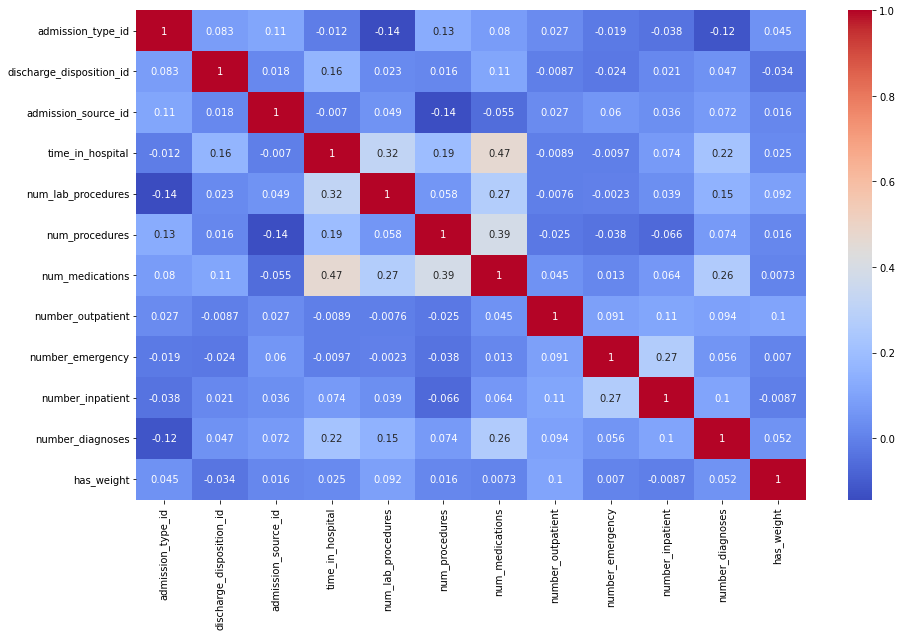

In [542]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

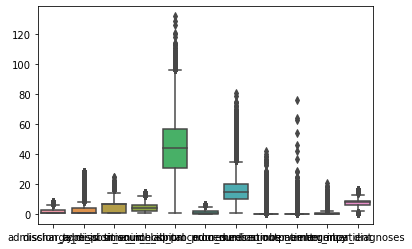

admission_type_id            341
discharge_disposition_id    3588
admission_source_id          175
time_in_hospital            1042
num_lab_procedures            43
num_procedures                 0
num_medications             1361
number_outpatient           1457
number_emergency            1664
number_inpatient            2016
number_diagnoses             281
dtype: int64


In [543]:
            # Plot boxplots of all numerical variables to identify outliers
            sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
            plt.show()

            # Calculate z-scores for all numerical variables
            z_scores = df.select_dtypes(include=['float64', 'int64']).apply(lambda x: (x - x.mean()) / x.std())

            # Identify outliers based on z-scores greater than 3 or less than -3
            outliers = (z_scores > 3) | (z_scores < -3)

            # Print the number of outliers for each variable
            print(outliers.sum())

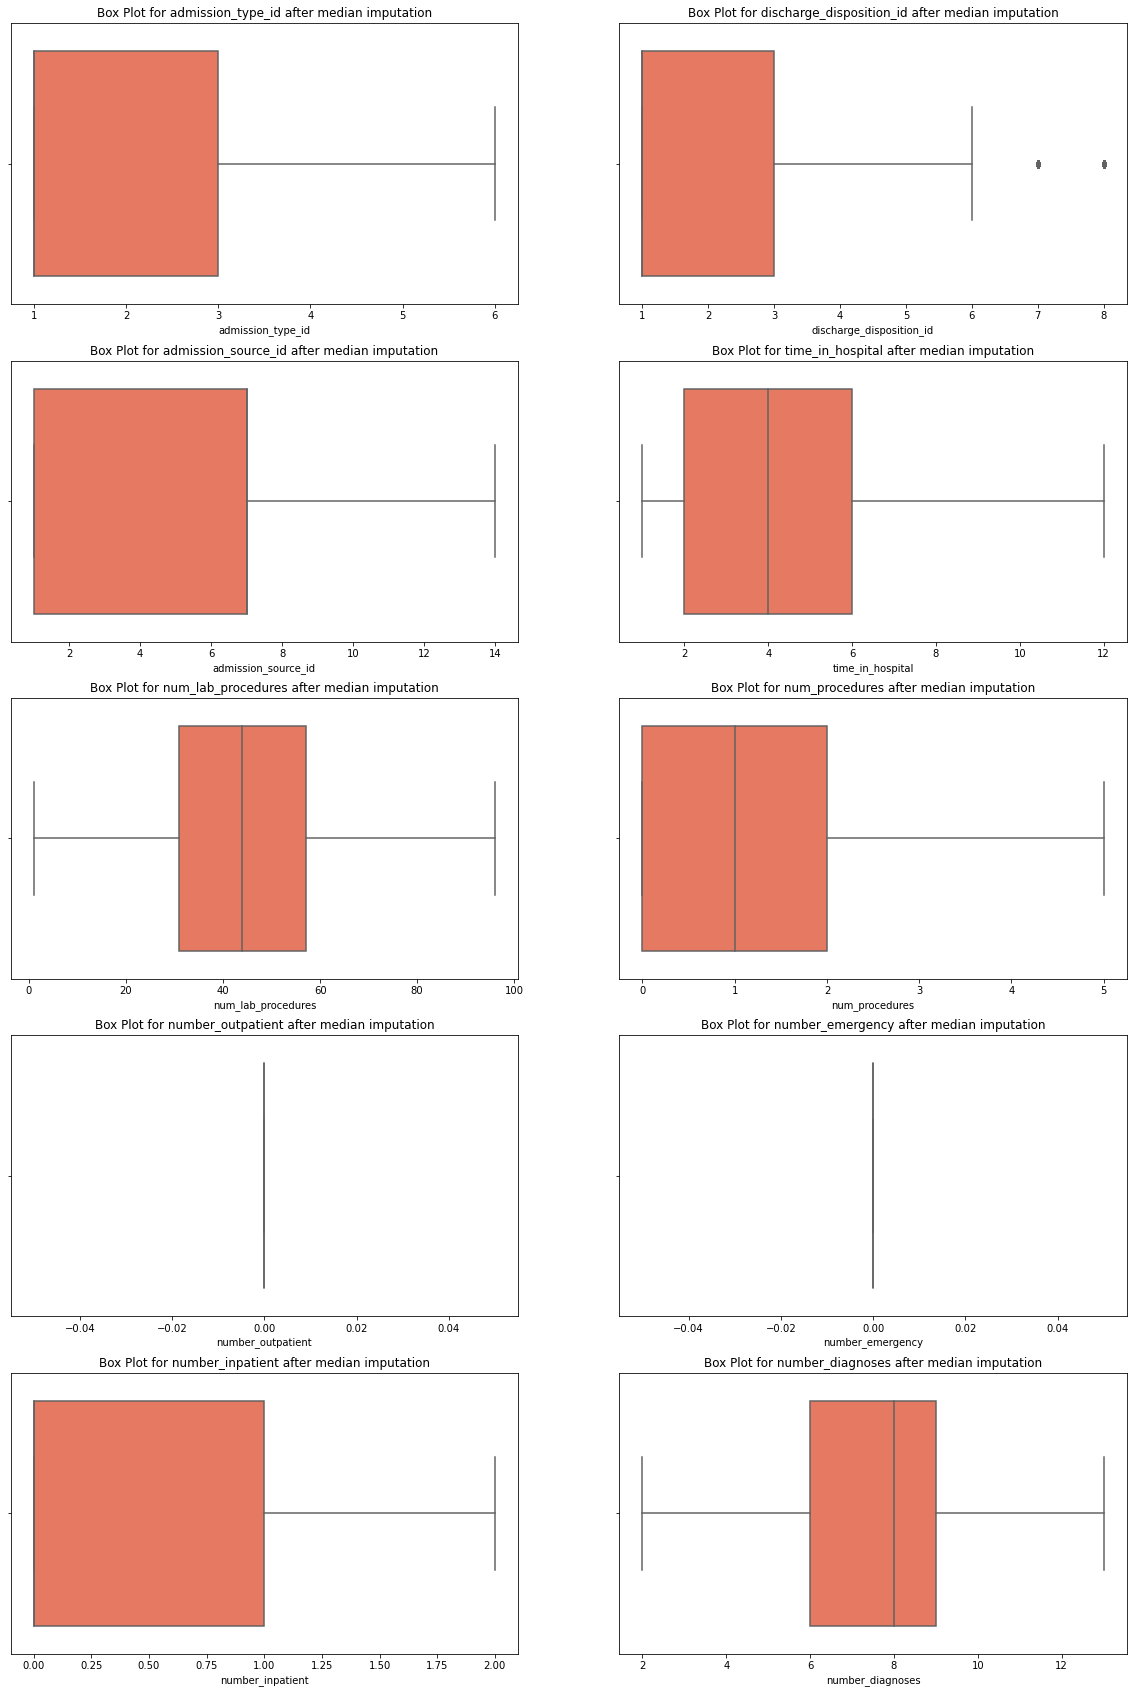

In [544]:

# Define a list of columns to replace outliers
cols_to_replace = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 
                   'num_lab_procedures', 'num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient',
                   'number_diagnoses']

# Define a function to replace outliers with the median value
def replace_outliers(df, col):
    q1 = df[col].quantile(0.25)  ## First Quattile
    q3 = df[col].quantile(0.75)  ## Third Quartile
    iqr = q3 - q1                ## IQR
    lower_tail = q1 - 1.5 * iqr  ## Lower Whisker
    upper_tail = q3 + 1.5 * iqr  ## Upper Whisker
    med = np.median(df[col])
    for i in df[col]:
        if i > upper_tail or i < lower_tail:
            df[col] = df[col].replace(i, med)
    return df
## The median value is then calculated and used to replace any values in the column that are outside the lower and upper tails.

## Replace outliers for each column in the list
## The for loop is used to apply this function to each column in the list cols_to_replace.
for col in cols_to_replace:
    df = replace_outliers(df, col)

# Finally, the box plots are plotted for each column in the list to visualize the effect of the outlier replacement.
fig, axs = plt.subplots(5, 2, figsize=(20, 30)) ## total of 10 subplots. 
                                                ##The figsize argument sets the size of the entire figure.
axs = axs.ravel() ## line flattens the 2D grid of subplots into a 1D array of subplots, which is easier to iterate over.
for i, col in enumerate(cols_to_replace):  ##  function iterates over the cols_to_replace list, giving the index of each column as well as the column name itself.
    sns.boxplot(x=col, data=df, palette="Reds_r", ax=axs[i]) ## sets the color palette for the plot.
    axs[i].set_title("Box Plot for "+col+" after median imputation") ## title
plt.show()


## Feature engineering

The features you use influence more than everything else the result. No algorithm alone, to my knowledge, can supplement the information gain given by correct feature engineering

In [545]:
#Generating output variable
#we need to check whether a patient admitted within 30 days or not
df['target']=(df['readmitted']=='<30').astype('int')

#dropping readmitted column
df.drop(['readmitted'],axis=1,inplace=True)

Analyzing and encoding age column

In [549]:
print(df['age'].value_counts())

##Defines a dictionary 'cleanup_age' to map the age groups to their respective integer values.
cleanup_age = {"age":     {"[0-10)": 0, "[10-20)": 10,"[20-30)": 20,"[30-40)": 30,"[40-50)": 40,"[50-60)": 50,
    "[60-70)": 60,"[70-80)": 70,"[80-90)": 80,"[90-100)": 90}}

df.replace(cleanup_age, inplace=True) ##replace the original age groups with their corresponding integer values
## Useful for converting categorical age groups into numerical values for further analysis and modeling.

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


In [550]:
df.age

0          0
1         10
2         20
3         30
4         40
          ..
101761    70
101762    80
101763    70
101764    80
101765    70
Name: age, Length: 101766, dtype: int64

In [514]:
#analyzing gender column
df['gender'].value_counts()
#removing invalid/unknown entries for gender
df=df[df['gender']!='Unknown/Invalid']

## EDA
## Data visualization

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations

Text(0.5, 1.0, 'Distrinution of Readmission')

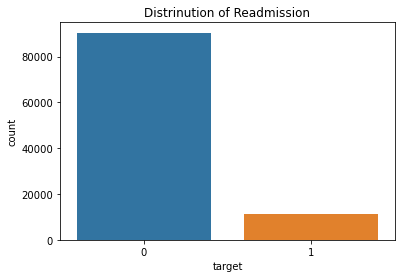

In [515]:
#Distribution of Readmission
sns.countplot(df['target']).set_title('Distrinution of Readmission')

## Insight from above graph: 
Our target variable is imbalance. Number of readmitted patient are quite less as compared to Not readmitted

In [516]:
#checking for balance data
print(sum(df['target'].values)/len(df['target'].values)) ##represents the proportion of positive cases in the dataset.

0.11160244882717688


## NOTE:
A balanced dataset would have a proportion of positive cases close to 0.5, indicating that the positive and negative cases are evenly distributed. 
However, if the proportion of positive cases is much lower or higher than 0.5, this may indicate a class imbalance.

Only 11% is re hospitalized so this is imbalance dataset.

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

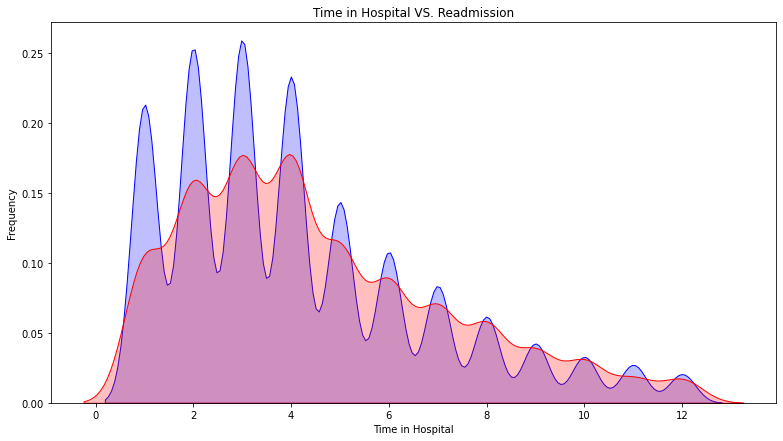

In [517]:
#time in hospital vs readmitted
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['target'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['target'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

## Insight from above graph: 
If no of days in hospital increased readmission rate is getting decreased.Mostly patient between 3 to 4 days are admitted frequently

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

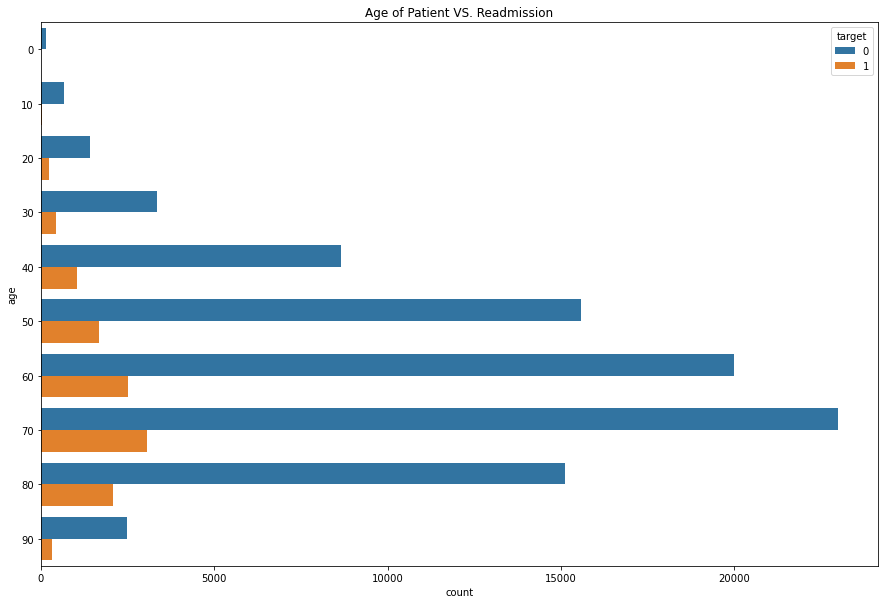

In [518]:
#age vs readmission

fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['target']).set_title('Age of Patient VS. Readmission')

## Insight from above graph: 
Patient with age 60 and 70 have more readmission

<AxesSubplot:xlabel='count', ylabel='race'>

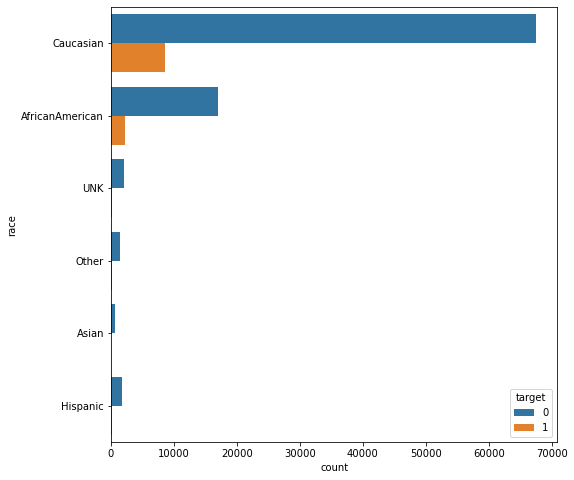

In [452]:
#race vs readmission

fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['target'])

## Insight from above graph : 
Caucasian race has more readmission

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

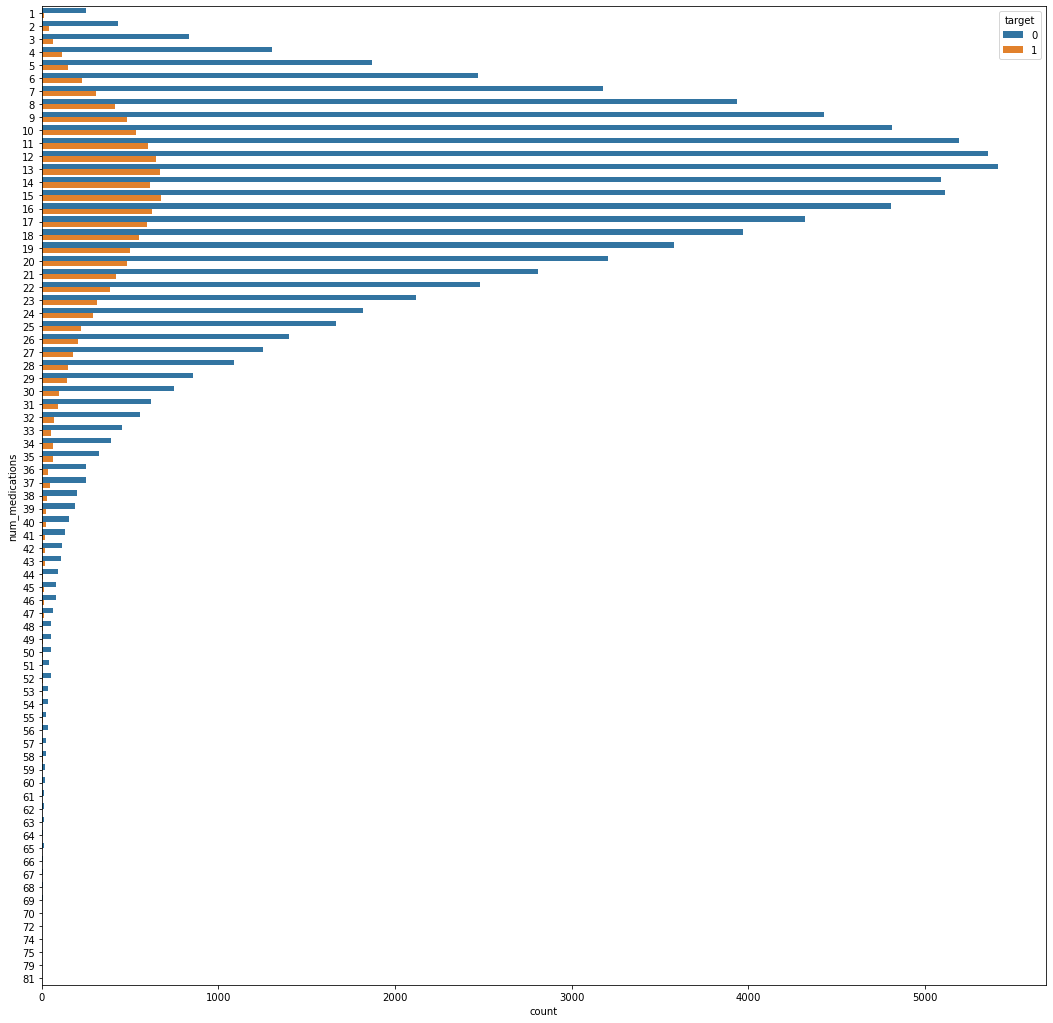

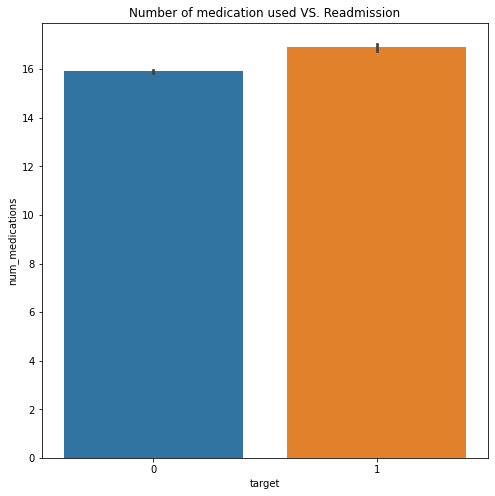

In [453]:
#Number of medication used VS. Readmission
fig = plt.figure(figsize=(18,18))
sns.countplot(y = df['num_medications'], hue = df['target'])
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['target'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

## Insight from above graph : 
If number of medications between 10 and 20 there is more chances that patient will admit again

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

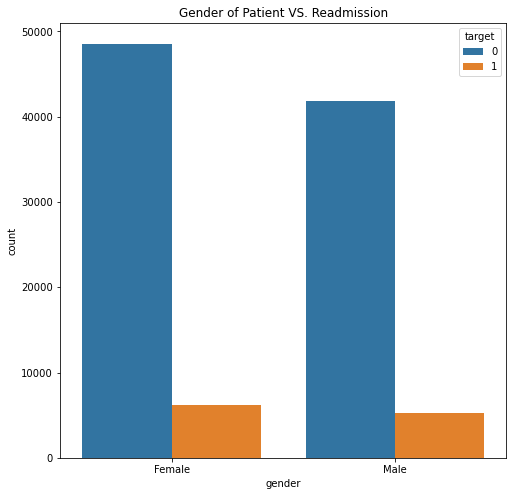

In [454]:
#Gender and Readmission
#Male = 1
#Female = 0

fig = plt.figure(figsize=(8,8))
sns.countplot(df['gender'], hue = df['target']).set_title("Gender of Patient VS. Readmission")

## Insight from above graph : 
Readmission rate of both male and female looks similar

Text(0.5, 1.0, 'Change of Medication VS. Readmission')

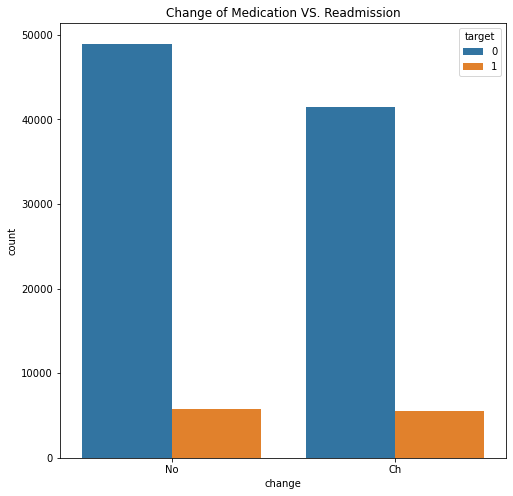

In [455]:
#change of medication vs readmission

fig = plt.figure(figsize=(8,8))
sns.countplot(df['change'], hue = df['target']).set_title('Change of Medication VS. Readmission')

## Insight from above graph :
Readmission rate looks similar wheteher the change of mediacation occurs or not

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

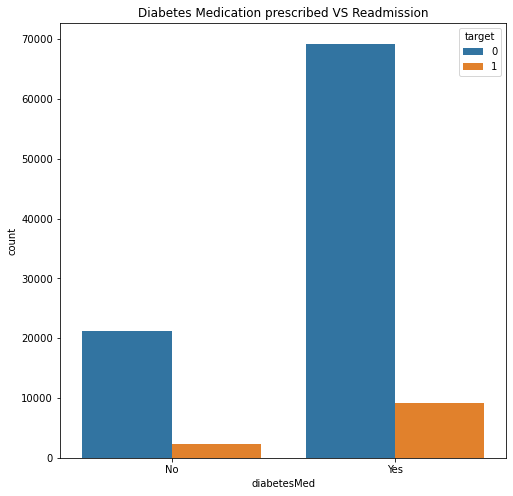

In [456]:
#diabetic medication vs readmission

fig = plt.figure(figsize=(8,8))
sns.countplot(df['diabetesMed'], hue = df['target']).set_title('Diabetes Medication prescribed VS Readmission')

## Insight from above graph : 
Patients provided with diabetes medication readmitted often

## Glucose Serum test - 
A blood glucose test is used to find out if your blood sugar levels are in the healthy range. It is often used to help diagnose and monitor diabetes.

'>200' : = indicates diabetes '>300' : = Indicates diabetes 'Norm' : = Normal 'None' : = test was not taken

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

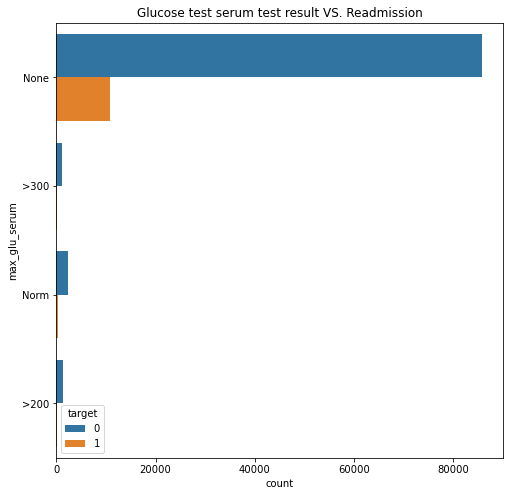

In [457]:
#max_glue_serum vs target
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['max_glu_serum'], hue = df['target']).set_title('Glucose test serum test result VS. Readmission')

## Insight from above graph : 
Patient who doen't take max glue serum test is readmitted often

## A1C result and Readmission A1C test - 
The A1C test is a blood test that provides information about your average levels of blood glucose, also called blood sugar, over the past 3 months

'>7' :1

'>8' :1

Norm : 0 = Normal

None : -99 = Test was not taken

Text(0.5, 1.0, 'A1C test result VS. Readmission')

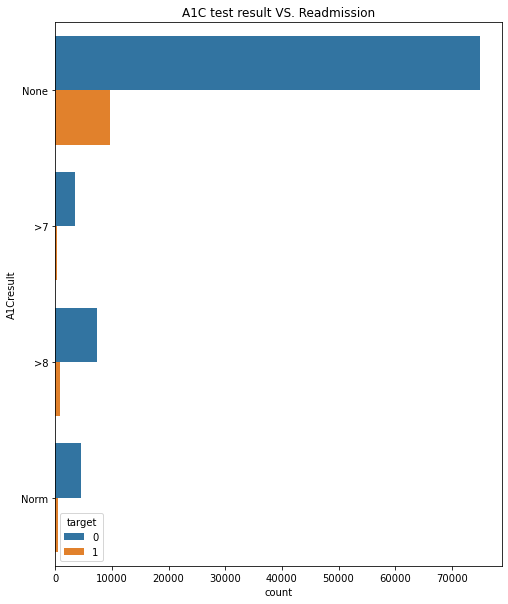

In [458]:
#a1c test result vs target
fig = plt.figure(figsize=(8,10))
sns.countplot(y= df['A1Cresult'], hue = df['target']).set_title('A1C test result VS. Readmission')

## Insight from above graph : 
Patient who doen't take a1ctest is readmitted often

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

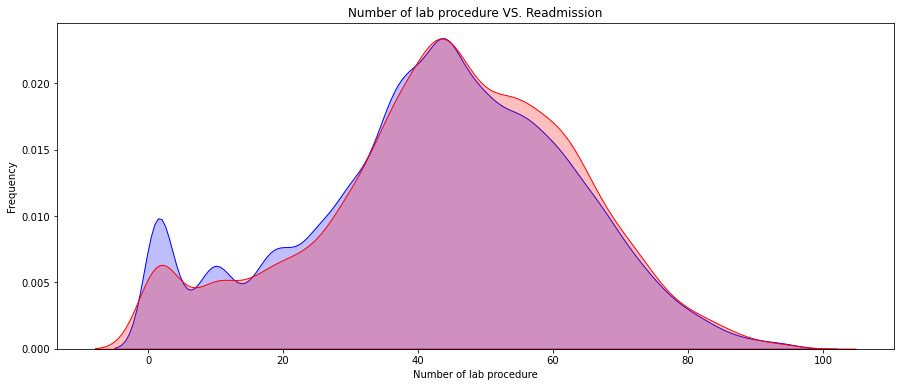

In [459]:
#no of lab procedure vs target
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['target'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['target'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

## Insight from above graph : 
Both admission and readmission have similar pattern for number of lab procedures

Text(0.5, 1.0, 'admission_type_id VS. Readmission')

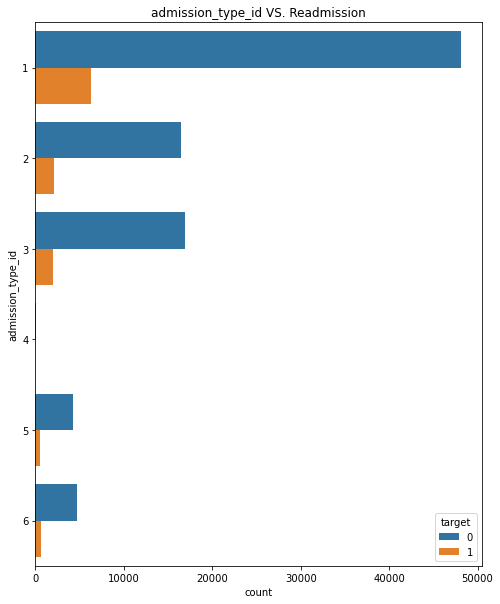

In [460]:
#admission type vs readmission
#1-	Emergency
#2-Urgent
#3-Elective
#4-Newborn
#5-Not Available
#6-NULL
#7-Trauma Center
#8-Not Mapped

fig = plt.figure(figsize=(8,10))
sns.countplot(y= df['admission_type_id'], hue = df['target']).set_title('admission_type_id VS. Readmission')

## Insight from above graph : 
Patient who admitted as emergency has more readmission

Text(0.5, 1.0, 'discharge_disposition_id VS. Readmission')

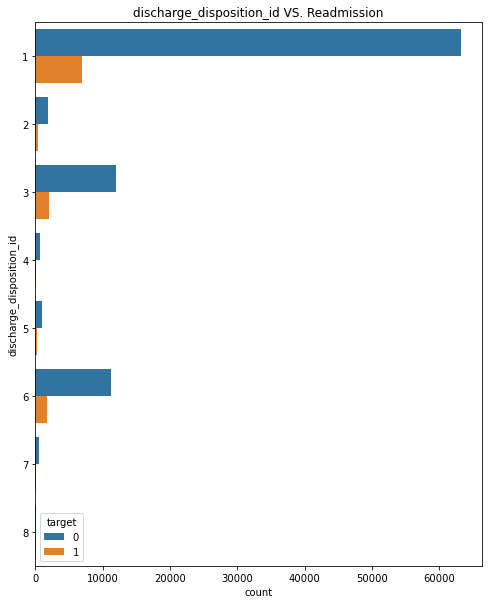

In [461]:
#discharge_disposition_id VS. Readmission
fig = plt.figure(figsize=(8,10))
sns.countplot(y= df['discharge_disposition_id'], hue = df['target']).set_title('discharge_disposition_id VS. Readmission')

## Insight from above graph : 
Patient who discharged to home has more readmission rate

In [462]:
categorical_feature=df.select_dtypes(include='object')
cat=categorical_feature.columns
print(cat)

Index(['race', 'gender', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')


Taking categorical Columns

Removing diag_ columns bcoz it is categorical and have more levels , this is handled by grouping which is done in later part

In [463]:
cat=['race', 'gender', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

In [464]:
#taking copy of dataframe
df_copy=df.copy()

## Numeric and categorical columns: 
'admission_type_id','discharge_disposition_id','admission_source_id'

## one-hot encoding

In [465]:
cols_cat_num=['admission_type_id','discharge_disposition_id','admission_source_id']
df[cols_cat_num]=df[cols_cat_num].astype('str')
df_cat=pd.get_dummies(df[cat+cols_cat_num],drop_first=True) ## one-hot encoding

## Note:
In the code above, the categorical columns in the dataframe df are converted into dummy variables using one-hot encoding. The get_dummies() function from the pandas library is used to create new columns in the dataframe for each unique value in the categorical columns, and assign a binary value of 1 or 0 to each row depending on whether that value is present in the original column. The drop_first=True parameter is used to avoid creating a dummy variable for the first value of each categorical column, in order to prevent multicollinearity in the model. The resulting dataframe df_cat contains only numerical columns.

In [466]:
print(df_cat.columns)

Index(['race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'race_UNK', 'gender_Male', 'payer_code_CH', 'payer_code_CM',
       'payer_code_CP', 'payer_code_DM',
       ...
       'admission_source_id_13', 'admission_source_id_14',
       'admission_source_id_2', 'admission_source_id_3',
       'admission_source_id_4', 'admission_source_id_5',
       'admission_source_id_6', 'admission_source_id_7',
       'admission_source_id_8', 'admission_source_id_9'],
      dtype='object', length=113)


In [467]:
#dropping encoded columns
for i in cat:
    df_copy.drop([i],axis=1,inplace=True)
    
## This will drop all the columns that are included in the cat list (i.e. categorical columns) from the df dataframe.

In [468]:
#concating encoded columns and other columns
df_copy=pd.concat([df_copy,df_cat],axis=1)

## Checking diag columns

In [469]:
df_copy['diag_3'].isnull().sum()
df_copy.dropna(inplace=True)
print(df_copy['diag_1'].nunique())
print(df_copy['diag_2'].nunique())
print(df_copy['diag_3'].nunique())

715
743
789


## Based on icd(international classification of disease) codes we group some disease

In [470]:
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    df_copy[col] = df_copy[col].str.replace('E','-')
    df_copy[col] = df_copy[col].str.replace('V','-')
    condition = df_copy[col].str.contains('250')
    df_copy.loc[condition,col] = '250' ## A way of simplifying the diagnoses by grouping all instances of diabetes together

df_copy[diag_cols] = df_copy[diag_cols].astype(float)

In [471]:
# diagnosis grouping
for col in diag_cols:
    df_copy['temp']=np.nan
    
    condition = df_copy[col]==250
    #condition = df_copy['diag_1']==250
    df_copy.loc[condition,'temp']='Diabetes'
    
    condition = (df_copy[col]>=390) & (df_copy[col]<=458) | (df_copy[col]==785)
    df_copy.loc[condition,'temp']='Circulatory'
    
    condition = (df_copy[col]>=460) & (df_copy[col]<=519) | (df_copy[col]==786)
    df_copy.loc[condition,'temp']='Respiratory'
    
    condition = (df_copy[col]>=520) & (df_copy[col]<=579) | (df_copy[col]==787)
    df_copy.loc[condition,'temp']='Digestive'
    
    condition = (df_copy[col]>=580) & (df_copy[col]<=629) | (df_copy[col]==788)
    df_copy.loc[condition,'temp']='Genitourinary'
    
    condition = (df_copy[col]>=800) & (df_copy[col]<=999)
    df_copy.loc[condition,'temp']='Injury'
    
    condition = (df_copy[col]>=710) & (df_copy[col]<=739)
    df_copy.loc[condition,'temp']='Muscoloskeletal'
    
    condition = (df_copy[col]>=140) & (df_copy[col]<=239)
    df_copy.loc[condition,'temp']='Neoplasms'
    
    condition = df_copy[col]==0
    df_copy.loc[condition,col]='?'
    df_copy['temp']=df_copy['temp'].fillna('Others')
    condition = df_copy['temp']=='0'
    df_copy.loc[condition,'temp']=np.nan
    df_copy[col]=df_copy['temp']
    df_copy.drop('temp',axis=1,inplace=True)

## Note:
This code block is grouping diagnosis codes into categories based on their ICD-9 codes, using the following guidelines:

Diagnosis codes starting with E or V are replaced with a hyphen (-).

Diagnosis codes containing 250 are labeled as "Diabetes".

Diagnosis codes in the range 390-458 and 785 are labeled as "Circulatory".

Diagnosis codes in the range 460-519 and 786 are labeled as "Respiratory".

Diagnosis codes in the range 520-579 and 787 are labeled as "Digestive".

Diagnosis codes in the range 580-629 and 788 are labeled as "Genitourinary".

Diagnosis codes in the range 800-999 are labeled as "Injury".

Diagnosis codes in the range 710-739 are labeled as "Musculoskeletal".

Diagnosis codes in the range 140-239 are labeled as "Neoplasms".

Diagnosis codes equal to 0 are replaced with a question mark (?).

Diagnosis codes not falling into any of the above categories are labeled as "Others".

The grouping is done for each of the three columns in diag_cols (i.e., 'diag_1', 'diag_2', and 'diag_3') by creating a new column called 'temp' to store the new labels, using the above guidelines to assign the labels, and then replacing the original diagnosis code with the new label. The 'temp' column is then dropped, and the resulting dataframe contains the diagnosis codes grouped into categories.

In [472]:
#ENCODING DIAG_ COLUMNS
df_cat_diag=pd.get_dummies(df_copy[diag_cols],drop_first=True)

#dropping encoded columns
for i in diag_cols:
    df_copy.drop([i],axis=1,inplace=True)

df_copy=pd.concat([df_copy,df_cat_diag],axis=1)

## Train_Test_Split

In [473]:
X=df_copy.drop(['target'],axis=1)
y=df_copy['target']

In [474]:

# shuffle and split the data
data = list(zip(X.values, y)) ##zip() function to create a list of tuples, where each tuple contains an input and its corresponding target value.
np.random.shuffle(data)

split = int(0.8 * len(data))
train_data = data[:split]
test_data = data[split:]

x_train = [d[0] for d in train_data]
y_train = [d[1] for d in train_data]
x_test = [d[0] for d in test_data]
y_test = [d[1] for d in test_data]


In [475]:
print("Shape of X_train: ", np.array(X_train).shape)
print("Shape of y_train: ", np.array(y_train).shape)
print("Shape of X_test: ", np.array(X_test).shape)
print("Shape of y_test: ", np.array(y_test).shape)


Shape of X_train:  (80192, 150)
Shape of y_train:  (80192,)
Shape of X_test:  (20049, 150)
Shape of y_test:  (20049,)


In [476]:
X_train = np.array(X_train)
y_train = np.array(y_train)
n = X_train.shape[1]
X_train = X_train.reshape(-1, n)
y_train = y_train.reshape(-1,)

##The -1 argument in the reshape() function indicates that the size of that dimension should be inferred from the shape of the original array. 
##So in this case, the X_train array is reshaped to have n columns, 
##while the y_train array is reshaped to be a 1-dimensional array.


In [477]:
X_test = np.array(X_test)
y_pred = model.predict(X_test)


## Model Building

In [478]:
class LogisticRegression:

    def __init__(self, learning_rate = 0.01, no_of_iterations = 1000):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.costs = []
    
    # Activation function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    
    def fit(self, X, y):  
        self.X = X
        self.Y= y
        self.m = X.shape[0]         # Number of rows in the data
        self.n = X.shape[1]         # Number of columns in the data
        self.w = np.zeros(self.n)   # Initializing weights
        self.b = 0                  # Initializing bias

        for i in range(0, self.no_of_iterations):
            # Prediction
            y_hat = self.sigmoid(self.X.dot(self.w) + self.b)
            
            # Calculating cost function
            cost = (-self.Y * np.log(y_hat) - (1 - self.Y) * np.log(1 - y_hat)).mean()
            self.costs.append(cost)
            
            # Calculating gradients for backward propagation
            dw = (1 / self.m) * np.dot(self.X.T, (y_hat - self.Y))
            db = (1 / self.m) * np.sum(y_hat - self.Y)
            
            # Updating parameters
            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db

    def predict(self, X):
        y_pred = self.sigmoid(X.dot(self.w) + self.b) 
        y_pred = np.where(y_pred > 0.4, 1, 0)   # y_pred = 1 if prob > 0.4 else 0
        return y_pred

## Summary:
This defines a LogisticRegression class that implements a logistic regression algorithm for binary classification. The class has three methods:

1.	__init__(self, learning_rate = 0.01, no_of_iterations = 1000): This is the constructor method that initializes the hyperparameters of the algorithm. It takes two arguments:

•	learning_rate: The learning rate determines the step size at each iteration while moving toward a minimum of the cost function.

•	no_of_iterations: The number of iterations to be performed for gradient descent.

2.	fit(self, X, y): This method fits the logistic regression model to the training data X and the corresponding binary labels y. It updates the weights and bias of the model using gradient descent optimization algorithm. The method performs the following steps:

•	Initializes the weights and bias to zero.

•	Calculates the sigmoid function to predict the binary labels.

•	Calculates the cost function to evaluate the quality of the predicted labels.

•	Calculates the gradients of the weights and bias using the cost function.

•	Updates the weights and bias using the gradients and learning rate.

3.	predict(self, X): This method predicts the binary labels for the input data X. It calculates the sigmoid function using the weights and bias of the trained logistic regression model, and converts the probabilities to binary labels using a threshold value of 0.4.

In [479]:
model = LogisticRegression(learning_rate= 0.1, no_of_iterations= 200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

## Summary:
In this code snippet, a LogisticRegression object is created with specified hyperparameters, and then it is trained on the training data and used to make predictions on the test data.

1.	A LogisticRegression object is created with a learning rate of 0.1 and 200 iterations for gradient descent. These hyperparameters can be adjusted based on the specific problem and the size and complexity of the data.

2.	The fit method of the LogisticRegression object is called with the training data X_train and corresponding labels y_train. This trains the logistic regression model using gradient descent to minimize the cost function.

3.	The predict method of the LogisticRegression object is called with the test data X_test. This generates predicted binary labels (y_pred) for the test data using the trained logistic regression model.


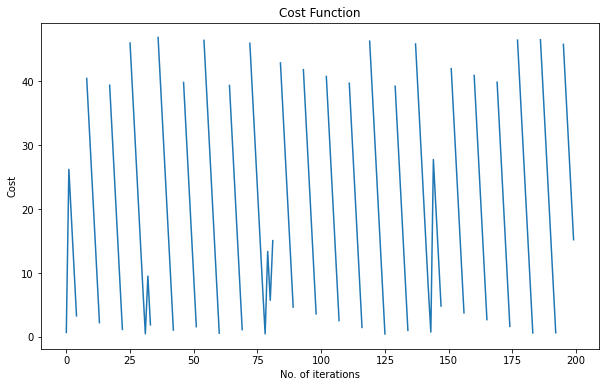

In [480]:
#Cost Function
plt.figure(figsize = (10, 6))
plt.title('Cost Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(model.costs)
plt.show()

## Summary:
This code generates a plot of the cost function versus the number of iterations during training of the logistic regression model. The purpose of this plot is to visualize how the cost function changes during training and to ensure that the optimization process is converging to a minimum.

The "model.costs" attribute is a list that stores the cost function value at each iteration of training.

The resulting plot shows how the cost function decreases over the iterations of training, indicating that the optimization process is converging towards a minimum. If the cost function did not decrease or increased over the iterations, this would indicate a problem with the optimization process, such as a learning rate that is too high or too low. By visualizing the cost function during training, we can diagnose potential issues with the optimization process and adjust the hyperparameters accordingly.


## Model Evaluation

## Accuracy

In [481]:
def accuracy(actual, predicted):
    correct_predictions = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct_predictions += 1
    return correct_predictions / float(len(actual)) * 100.0



## Summary:

The function takes two arguments:

•	actual: a list of the actual labels.

•	predicted: a list of the predicted labels.

The function iterates over the two lists and compares each element. If the actual label and predicted label match, it increments a counter correct_predictions. After iterating over all elements, the function returns the percentage of correct predictions.
The steps performed by the function are as follows:

1.	Initialize a counter correct_predictions to 0.

2.	For each index i in the range 0 to len(actual) - 1, do the following:

•	If the i-th element of actual is equal to the i-th element of predicted, increment correct_predictions.

3.	Return the accuracy as the ratio of correct_predictions to len(actual), multiplied by 100.0 to convert to a percentage.

The accuracy function is a useful metric for evaluating the performance of a classification model. It indicates the proportion of correctly classified examples out of the total number of examples. By comparing the accuracy of different models or different hyperparameter settings, we can determine which ones perform better on the given task.


## Precision

In [482]:
def precision(actual, predicted):
    true_positives = 0
    false_positives = 0
    for i in range(len(actual)):
        if predicted[i] == 1:
            if actual[i] == predicted[i]:
                true_positives += 1
            else:
                false_positives += 1
    if true_positives + false_positives == 0:
        return 0.0
    else:
        return true_positives / float(true_positives + false_positives) * 100.0

## Summary:
This function precision calculates the precision of the predicted labels given the actual labels.
The function takes two arguments:

•	actual: a list of the actual labels.

•	predicted: a list of the predicted labels.

The function iterates over the two lists and compares each element. If the predicted label is 1 and it matches the actual label, it increments a counter true_positives. If the predicted label is 1 but does not match the actual label, it increments a counter false_positives. After iterating over all elements, the function calculates and returns the precision.

The steps performed by the function are as follows:

1.	Initialize counters true_positives and false_positives to 0.

2.	For each index i in the range 0 to len(actual) - 1, do the following:

•	If the i-th element of predicted is 1, then:

•	If the i-th element of actual is also 1, increment true_positives.

•	If the i-th element of actual is 0, increment false_positives.

3.	Calculate the precision as the ratio of true_positives to the sum of true_positives and false_positives, multiplied by 100.0 to convert to a percentage.

4.	Return the precision.

The precision function is a useful metric for evaluating the performance of a classification model, particularly in situations where false positives are costly or undesirable. It measures the proportion of predicted positives that are actually true positives. By comparing the precision of different models or different hyperparameter settings, we can determine which ones perform better on the given task.


## Recall

In [483]:
def recall(actual, predicted):
    true_positives = 0
    false_negatives = 0
    for i in range(len(actual)):
        if actual[i] == 1:
            if actual[i] == predicted[i]:
                true_positives += 1
            else:
                false_negatives += 1
    if true_positives + false_negatives == 0:
        return 0.0
    else:
        return true_positives / float(true_positives + false_negatives) * 100.0

## Summary:
These functions are used to evaluate the performance of a binary classification model.

accuracy calculates the percentage of correct predictions out of all predictions.

precision calculates the percentage of true positives out of the total number of predicted positives. It measures the accuracy of the positive predictions.

recall calculates the percentage of true positives out of the total number of actual positives. It measures the ability of the model to correctly identify positive instances.


## F1_Score

In [ ]:
def f1_score(actual, predicted):
    tp = 0
    fp = 0
    fn = 0
    for i in range(len(actual)):
        if actual[i] == 1 and predicted[i] == 1:
            tp += 1
        elif actual[i] == 0 and predicted[i] == 1:
            fp += 1
        elif actual[i] == 1 and predicted[i] == 0:
            fn += 1
    if tp == 0:
        return 0
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)
    return f1


## Summary:
•	Accuracy: measures the proportion of correct predictions among all predictions made. It is calculated as 

(true positives + true negatives) / total number of predictions.

•	Precision: measures the proportion of true positives among all positive predictions made. It is calculated as 

true positives / (true positives + false positives).

•	Recall: measures the proportion of true positives among all actual positive instances. It is calculated as 

true positives / (true positives + false negatives).

•	F1 score: is the harmonic mean of precision and recall. It takes into account both precision and recall, providing a balance between the two metrics. It is calculated as 

2 * (precision * recall) / (precision + recall).


In [487]:
print(f'Accuracy: {accuracy(y_test, y_pred)}%') ## Accuracy
print(f'Precision: {precision(y_test, y_pred)}%') ## Precision
print(f'Recall: {recall(y_test, y_pred)}%') ## Recall
print(f'F1_Score: {f1_score(y_test, y_pred)}%') ## F1_Score

Accuracy: 88.97201855454138%
Precision: 0.0%
Recall: 0.0%
F1_Score: 0%
